In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

0. Wine Quality Dataset 🍷
Dataset Link: Wine Quality on UCI
Description: Classify wine samples based on chemical properties.


Features (11): Acidity, alcohol %, density, pH, etc.
Labels (2): Red wine 🍷 or White wine 🍾.
📌 Question:
Train a K-NN classifier to predict wine type (red or white).
Optimize k value with GridSearchCV.
Compare results using different normalization techniques (StandardScaler vs MinMaxScaler).
📌 Expected from you:

Preprocess the data and handle missing values.
Find the best k value and metric.
Report precision, recall, and confusion matrix.

In [15]:
df = wine_quality_df = pd.read_csv('/content/WineQT.csv')

In [16]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [17]:
import matplotlib.pyplot as plt

In [44]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

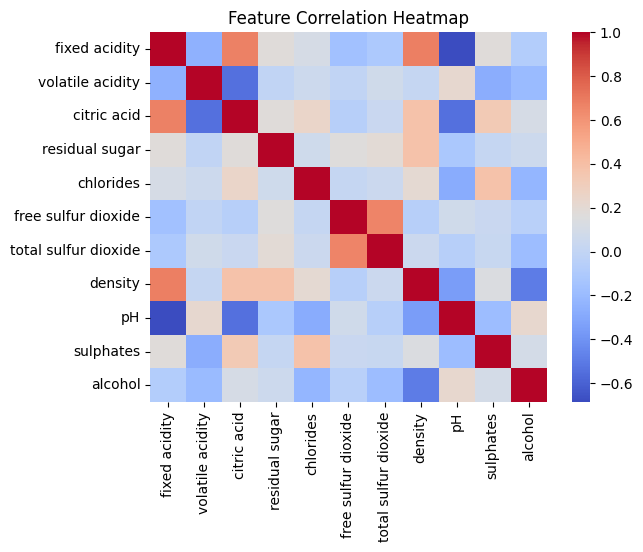

In [45]:
sns.heatmap(df.drop(['quality' , 'Id'], axis=1).corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [46]:
X = df.drop(['quality' , 'Id'] , axis = 1)
y = df['quality']

In [47]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [48]:
pipeline = Pipeline([
    ('scaler' , StandardScaler()),
    ('knn' , KNeighborsClassifier())
])

In [49]:
param_grid = {
    'knn__n_neighbors': list(range(1,31)),
    'knn__metric': ['euclidean' , 'manhattan' , 'minkowski']
}

In [50]:
grid_search = GridSearchCV(pipeline , param_grid , cv=5 , scoring='accuracy' , n_jobs=1 )
grid_search.fit(X_train , y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=1,
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             scoring='accuracy')

In [51]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 30}
Best Cross-Validation Score: 0.7396084789527413


In [52]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [53]:
# Print accuracy and classification report
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.7379912663755459
Confusion Matrix:
 [[73 29]
 [31 96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       102
           1       0.77      0.76      0.76       127

    accuracy                           0.74       229
   macro avg       0.73      0.74      0.74       229
weighted avg       0.74      0.74      0.74       229

